In [9]:
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from sklearn import preprocessing
import random
import numpy as np
from sklearn.impute import SimpleImputer

In [2]:
# spotify developerから取得したclient_idとclient_secretを入力
client_id = "18308f0d5b8049c89ee330d9cfa4bc58"  # client ID
client_secret = "eff59f147eac4c8db8a9f190336aa548"  # client secret

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, language='ja')

In [10]:
# プレイリスト内の楽曲idをすべて取得する関数
def getTrackIDs(playlist_ids): # 引数はプレイリストのid
    track_ids = []
    track_url = []

    for playlist_id in playlist_ids:
        playlist = sp.playlist(playlist_id)
        while playlist["tracks"]["next"]:
            for item in playlist["tracks"]["items"]:
                track = item["track"]
                if not track["id"] in track_ids:
                    track_ids.append(track["id"])
            playlist["tracks"] = sp.next(playlist["tracks"])
        else:
            for item in playlist["tracks"]["items"]:
                track = item["track"]
                if not track["id"] in track_ids:
                    track_ids.append(track["id"])
    return track_ids

# 楽曲ごとのデータを取得する関数
def getTrackFeatures(id): # 引数は楽曲のid
    meta = sp.track(id)
    features = sp.audio_features(id)

    name = meta["name"]
    album = meta["album"]["name"]
    artist = meta["album"]["artists"][0]["name"]
    release_date = meta["album"]["release_date"]
    length = meta["duration_ms"]
    popularity = meta["popularity"]
    url = meta['external_urls']['spotify']
    image = meta["album"]['images'][0]["url"]
    audio = meta["preview_url"]
    key = features[0]["key"]
    mode = features[0]["mode"]
    danceability = features[0]["danceability"]
    acousticness = features[0]["acousticness"]
    energy = features[0]["energy"]
    instrumentalness = features[0]["instrumentalness"]
    liveness = features[0]["liveness"]
    loudness = features[0]["loudness"]
    speechiness = features[0]["speechiness"]
    tempo = features[0]["tempo"]
    time_signature = features[0]["time_signature"]
    valence = features[0]["valence"]

    track = [name,album,artist,release_date,length,popularity,url,image,audio,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,]
    return track

# IDで指定したプレイリストの楽曲情報をcsvファイルに保存する関数
def playlist(playlist_ids,csv_name):
    # SpotifyのプレイリストのIDを入力(複数でも可能)(複数の場合、楽曲の重複は許さない)
    track_ids = getTrackIDs(playlist_ids)

    tracks = [] # 楽曲を格納するリスト

    for track_id in track_ids:
        track = getTrackFeatures(track_id)
        tracks.append(track)
    
    df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'url', 'image', 'audio', 'key', 'mode', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
    df.to_csv(csv_name, sep = ',', encoding='utf_8_sig')
    return df
    
# データを正規化+欠損値を補完してcsvファイルに保存する関数
def Normal(df,csv_name):
    # データを正規化
    mm = preprocessing.MinMaxScaler()
    df_mm=df[['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
    df_mm = mm.fit_transform(df_mm)
    df_mm = pd.DataFrame(df_mm, columns=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence'])
    df_mm.insert(0, "release_date", df["release_date"])
    df_mm.insert(0, "artist", df["artist"])
    df_mm.insert(0, "name", df["name"])
    df_mm.insert(len(df_mm.columns),"url", df["url"])
    df_mm.insert(len(df_mm.columns),"image", df["image"])
    df_mm.insert(len(df_mm.columns),"audio", df["audio"])
    df_mm["loudness"]=df_mm["loudness"].abs()
    
    #Dataframe値をarrayで読込
    X = df_mm.iloc[:,:14].values
    #インスタンス生成・平均値補完
    si = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='なし')
    #補完
    X = si.fit_transform(X)
    #新規のDataFrameを生成
    df_mm = pd.DataFrame(X,columns=list(df_mm.columns))
    
    df_mm.to_csv(csv_name, sep = ',', encoding='utf_8_sig')

In [ ]:
ID=["37i9dQZEVXbMDoHDwVN2tF?si=ae6390e6d9b64392"]
playlist(ID,'spotify_data_sample.csv')

In [5]:
# 練習
ID=["0Qs4nw7ipSICLfXqOKWWLV?si=196e1e3462a54e56"]
df=playlist(ID,'spotify_data_global.csv')

In [73]:
ID=["0Qs4nw7ipSICLfXqOKWWLV?si=196e1e3462a54e56"] # 練習用
IDs=getTrackIDs(ID)

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, '既存の接続はリモート ホストに強制的に切断されました。', None, 10054, None))

In [24]:
getTrackFeatures(IDs[1])

https://open.spotify.com/track/1YIr7kCHsECRkVclYvFRUY
https://i.scdn.co/image/ab67616d0000b27304de30150845423a9d528a1b
https://p.scdn.co/mp3-preview/ca552bae843c805c68169cbf67c06e9f2dc38d2b?cid=18308f0d5b8049c89ee330d9cfa4bc58


['キャットラビング',
 'キャットラビング',
 '香椎モイミ',
 '2021-12-18',
 117055,
 51,
 'https://open.spotify.com/track/1YIr7kCHsECRkVclYvFRUY',
 2,
 1,
 0.609,
 0.0149,
 0.859,
 0.835,
 0.0167,
 -7.784,
 0.0391,
 163.048,
 4,
 0.808]

In [7]:
# 洋楽
ID=["1eBroudkoPFjKfBSl6m0q9?si=04fd2fd234494dcb",
    "4HSDhmLju8RKGFxMpr7JOQ?si=4e7f52d76aa2406d"]
df=playlist(ID,'spotify_data_global.csv')

In [11]:
# 洋楽(正規化)
df=pd.read_csv('spotify_data_global.csv')
Normal(df,'spotify_data_global_mm.csv')

In [13]:
# 邦楽
ID=["7s6EDeIROFUDWpg7xdzcvQ?si=f6c6da5fa3bc4959",
    "53Opp1EdwfHij4PVHIW16F?si=c434fb6d74ae4e68",
    "7bZGTIrO8XVJFqNFR1BHez?si=01240e12f3f94585"]
df=playlist(ID,'spotify_data_JP_famous.csv')

In [14]:
# 邦楽(正規化)
df=pd.read_csv('spotify_data_JP_famous.csv')
Normal(df,'spotify_data_JP_famous_mm.csv')

In [16]:
# ボカロ
ID=["4zg739VKrRbD5z3Xj4yjgz?si=8147f91f206e40f3",
    "2nZdwEso65CYx84J0h2urc?si=b14a1ed243c744a2",
    "7phdTgX9Bq19f1nqutnc6o?si=dc782acaab1c4ae8"]
df=playlist(ID,'spotify_data_vocaloid.csv')

In [17]:
# ボカロ(正規化)
df=pd.read_csv('spotify_data_vocaloid.csv')
Normal(df,'spotify_data_vocaloid_mm.csv')

In [83]:
# 楽曲データを保存する関数関数
def music_data(ans):# 回答を引数とする
    if ans[0]==1:
        df = pd.read_csv('spotify_data_global_mm.csv') # 正規化したデータ
    elif ans[0]==2:
        df = pd.read_csv('spotify_data_JP_famous_mm.csv')
    elif ans[0]==3:
        df = pd.read_csv('spotify_data_vocaloid_mm.csv')
    return df

# 楽曲をリコメンドする関数
def music_recommend(ans,df):# 回答を引数とする
    data=['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence', 'url', 'image', 'audio']
    df = df[data]
    rec_music_data=[]
    min_point=10000
    for i in range(len(df)):
        point=0
        cnt=len(df)/5
        for j in range(len(ans)-1):
            if ans[j+1]==5:
                point+=random.uniform(0, 1)
            else:
                df_sort=df.sort_values(by=data[j+5], ascending=True)
                rand=random.uniform(df_sort.values[int(ans[j+1]*cnt)][j+5], df_sort.values[int((ans[j+1]+1)*cnt)-1][j+5])
                point+=pow(df.values[i][j+5]-rand,2)
        if point<min_point:
            min_point=point
            min_i=i
    rec_music_data.append(df.values[min_i][0]) # リコメンドする楽曲
    rec_music_data.append(df.values[min_i][1]) # リコメンドする楽曲のアーティスト名
    rec_music_data.append(df.values[min_i][11]) # リコメンドする楽曲のurl
    rec_music_data.append(df.values[min_i][12]) # リコメンドする楽曲のimage
    rec_music_data.append(df.values[min_i][13]) # リコメンドする楽曲のaudio
    return rec_music_data
    
ans=[]
print("最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?")
ans.append(int(input()))
print("踊れる曲かどうか(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("アコースティック感(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("エネルギッシュさ(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("音量・音圧(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("テンポは?(遅め(0)-やや遅め(1)-普通(2)-やや早め(3)-早め(4)-指定なし(5))")
ans.append(int(input()))
print("悲観的か楽観的か(悲観的(0)-やや悲観的(1)-普通(2)-やや楽観的(3)-楽観的(4)-指定なし(5))")
ans.append(int(input()))

# レコメンド
df=music_data(ans)
music_recommend(ans,df)

最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?


 1


踊れる曲かどうか(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 5


アコースティック感(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 5


エネルギッシュさ(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 5


音量・音圧(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 5


テンポは?(遅め(0)-やや遅め(1)-普通(2)-やや早め(3)-早め(4)-指定なし(5))


 5


悲観的か楽観的か(悲観的(0)-やや悲観的(1)-普通(2)-やや楽観的(3)-楽観的(4)-指定なし(5))


 5


["I'm Good (Blue)",
 'デヴィッド・ゲッタ',
 'https://open.spotify.com/track/4uUG5RXrOk84mYEfFvj3cK',
 'https://i.scdn.co/image/ab67616d0000b273933c036cd61cd40d3f17a9c4',
 'https://p.scdn.co/mp3-preview/f387f0bdbce0f044f7bf9e2e6a87f59cd78f20a4?cid=18308f0d5b8049c89ee330d9cfa4bc58']

In [64]:
from sklearn.impute import SimpleImputer
data=['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence', 'url', 'image', 'audio']
df2 = df[data]

#Dataframe値をarrayで読込
X = df2.iloc[:,:14].values

#インスタンス生成・平均値補完
si = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value='なし')

#補完
X = si.fit_transform(X)

#新規のDataFrameを生成
df2 = pd.DataFrame(X,columns=list(df2.columns))

df2.tail()

,name,artist,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence,url,image,audio
45,Jimmy Cooks (feat. 21 Savage),ドレイク,2022-06-17,0.600235,0.842105,0.302479,0.000081,0.549383,0.796742,0.701766,0.272509,https://open.spotify.com/track/3F5CgOj3wFlRv51...,https://i.scdn.co/image/ab67616d0000b2738dc0d8...,なし
46,Mary On A Cross,Ghost,2019-09-13,0.731424,0.754386,0.198347,0.0,0.899691,0.819663,0.408787,0.506603,https://open.spotify.com/track/2HZLXBOnaSRhXSt...,https://i.scdn.co/image/ab67616d0000b273bef9b0...,なし
47,Ghost,ジャスティン・ビーバー,2021-03-19,0.276857,0.807018,0.421488,0.207423,0.654321,0.715476,0.604155,0.362545,https://open.spotify.com/track/6I3mqTwhRpn34SL...,https://i.scdn.co/image/ab67616d0000b273e6f407...,なし
48,La Corriente,バッド・バニー,2022-05-06,0.501015,0.842105,0.523967,0.256819,0.723765,0.910494,0.948212,0.528211,https://open.spotify.com/track/1797zYiX4cKosMH...,https://i.scdn.co/image/ab67616d0000b27349d694...,https://p.scdn.co/mp3-preview/5b652748ee9a5a10...
49,Blinding Lights,ザ・ウィークエンド,2020-03-20,0.509316,0.824561,0.277686,0.001375,0.637346,0.680905,0.743255,0.234094,https://open.spotify.com/track/0VjIjW4GlUZAMYd...,https://i.scdn.co/image/ab67616d0000b2738863bc...,なし


In [85]:
def circle(values, name): # valuesは各値を入れたリスト
    #フォントの設定
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'MS Gothic'

    #ラベルの設定
    subjectNames = ['danceability', 'acousticness', 'energy', 'loudness', 'tempo', 'valence']
    #角度の設定
    angles = np.linspace(0, 2 * np.pi, len(subjectNames) + 1)

    #データの設定
    scores = np.array(values)
    values = np.concatenate([scores, [scores[0]]])

    #グラフの描画
    fig = plt.figure()
    ax = fig.add_subplot(111, polar = True)

    #塗りつぶし
    ax.fill(angles, values, alpha=0.3)

    # 項目ラベルの表示
    ax.set_rlim(0, 1)

    #θ軸ラベルの設定(弧度法)
    labels = [f'{subjectNames[i]}' for i in range(0, len(subjectNames))]
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    ax.set_theta_zero_location("N")#0度が上に来るようにする

    #タイトル
    ax.set_title(name)

    #描画
    ax.plot(angles, values)

In [114]:
df = pd.read_csv('spotify_data_vocaloid_mm.csv')
df_sort=df.sort_values(by=data[5], ascending=False)
display(df_sort)
df_sort['danceability'].values

,Unnamed: 0,name,artist,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence,url,image,audio
47,47,限りなく灰色へ (feat. 宵崎奏&朝比奈まふゆ&東雲絵名&暁山瑞希&鏡音リン),25時、ナイトコードで。,2022-01-19,0.617613,0.827586,1.000000,0.120900,0.448882,0.519752,0.226364,0.721925,https://open.spotify.com/track/2kvYOzDQ8BZ9t0w...,https://i.scdn.co/image/ab67616d0000b27307fd0f...,https://p.scdn.co/mp3-preview/e60bb57c4c8ccee8...
48,48,夜明けと蛍,n-buna,2015-07-22,0.777088,0.517241,0.976661,0.720671,0.151757,0.446617,0.000000,0.836898,https://open.spotify.com/track/7zzMTPHYh2ntj2P...,https://i.scdn.co/image/ab67616d0000b273424682...,https://p.scdn.co/mp3-preview/f9e23c5bb9255042...
25,25,ラブカ?,柊キライ,2020-12-12,0.236627,0.724138,0.924596,0.536871,0.578275,0.597232,0.444337,0.568182,https://open.spotify.com/track/5R3XD7aR25OcI6q...,https://i.scdn.co/image/ab67616d0000b273be8e4d...,https://p.scdn.co/mp3-preview/46f9d3ff001ae66c...
81,81,妄想税,DECO*27,2014-03-26,0.373359,0.275862,0.890485,0.132993,0.405751,0.650978,0.435801,0.870321,https://open.spotify.com/track/29JFaA8DQ4D7IPv...,https://i.scdn.co/image/ab67616d0000b273d0e912...,https://p.scdn.co/mp3-preview/9997af3cd819813c...
33,33,回る空うさぎ,Akuya,2021-05-24,0.229617,0.793103,0.885099,1.000000,0.000000,0.284737,0.321256,0.675134,https://open.spotify.com/track/52Id9w2ov7p3x8L...,https://i.scdn.co/image/ab67616d0000b2733c3ae6...,https://p.scdn.co/mp3-preview/4e97555c015a0d4b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,66,Black Rock Shooter,mulmeyun,2020-02-26,0.747661,0.206897,0.134650,0.060440,0.667732,0.000000,0.020032,0.140374,https://open.spotify.com/track/5Vfogneq6fwqvzT...,https://i.scdn.co/image/ab67616d0000b27323309d...,https://p.scdn.co/mp3-preview/52c5f0b57094159a...
77,77,ワールドイズマイン -MIKUNOPOLIS in LOS ANGELES Live-,ヴァリアス・アーティスト,2011,0.205663,0.827586,0.070018,0.088977,0.920128,0.709872,0.685594,0.332888,https://open.spotify.com/track/1chETycPdQmdJsW...,https://i.scdn.co/image/ab67616d0000b273f812dc...,https://p.scdn.co/mp3-preview/7f42622f1862c88d...
9,9,ヴィラン,てにをは,2020-02-29,0.302833,0.689655,0.066427,0.007573,0.811502,0.667713,0.984349,0.704545,https://open.spotify.com/track/5CSVNJBsEPH3cM7...,https://i.scdn.co/image/ab67616d0000b2736fe37c...,https://p.scdn.co/mp3-preview/f230b383988193d2...
36,36,メルト -MIKU EXPO 2014 in INDONESIA Live-,ヴァリアス・アーティスト,2014-10-06,0.669876,0.482759,0.023339,0.003123,0.980831,0.783168,0.727094,0.135027,https://open.spotify.com/track/6nWONiqCJwFxKKf...,https://i.scdn.co/image/ab67616d0000b273d0a10a...,https://p.scdn.co/mp3-preview/80797951a0e1b00d...


array([1.        , 0.97666068, 0.92459605, 0.89048474, 0.88509874,
       0.87971275, 0.84739677, 0.84201077, 0.82764811, 0.80251346,
       0.7432675 , 0.72172352, 0.71813285, 0.71095153, 0.7037702 ,
       0.68761221, 0.68402154, 0.68043088, 0.67684022, 0.67504488,
       0.66786355, 0.65888689, 0.64991023, 0.6481149 , 0.64631957,
       0.63734291, 0.62657092, 0.62118492, 0.61938959, 0.60861759,
       0.60502693, 0.59605027, 0.59245961, 0.58348294, 0.57989228,
       0.56732496, 0.56373429, 0.56193896, 0.56193896, 0.55655296,
       0.55475763, 0.55116697, 0.54578097, 0.53859964, 0.53500898,
       0.52782765, 0.51885099, 0.502693  , 0.502693  , 0.50089767,
       0.497307  , 0.497307  , 0.48473968, 0.48114901, 0.47755835,
       0.47576302, 0.47396768, 0.46678636, 0.46140036, 0.45960503,
       0.45062837, 0.44883303, 0.44883303, 0.44883303, 0.43985637,
       0.43985637, 0.43447038, 0.42728905, 0.40574506, 0.39497307,
       0.38958707, 0.38779174, 0.38779174, 0.38061041, 0.37701

In [134]:
import bisect
df = pd.read_csv('spotify_data_global_mm.csv')
data=['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence', 'url', 'image', 'audio']
rank=[]
min_values=[df['danceability'].values[1],
            df['acousticness'].values[1],
            df['energy'].values[1],
            df['loudness'].values[1],
            df['tempo'].values[1],
            df['valence'].values[1]]
for i in range(6):
    df_sort=df.sort_values(by=data[i+5], ascending=True)
    cnt=bisect.bisect(list(df_sort[data[i+5]].values),min_values[i])
    rank.append(len(df)-cnt+1)
print(rank)

[45, 12, 18, 20, 4, 16]


In [126]:
df_sort=df.sort_values(by=data[5], ascending=True)
df_sort[data[5]].values

array([0.        , 0.02333932, 0.06642729, 0.07001795, 0.13464991,
       0.19210054, 0.20287253, 0.2459605 , 0.27289048, 0.28366248,
       0.29263914, 0.32495512, 0.33213645, 0.35368043, 0.35547576,
       0.35906643, 0.36086176, 0.36804309, 0.36983842, 0.37522442,
       0.37701975, 0.38061041, 0.38779174, 0.38779174, 0.38958707,
       0.39497307, 0.40574506, 0.42728905, 0.43447038, 0.43985637,
       0.43985637, 0.44883303, 0.44883303, 0.44883303, 0.45062837,
       0.45960503, 0.46140036, 0.46678636, 0.47396768, 0.47576302,
       0.47755835, 0.48114901, 0.48473968, 0.497307  , 0.497307  ,
       0.50089767, 0.502693  , 0.502693  , 0.51885099, 0.52782765,
       0.53500898, 0.53859964, 0.54578097, 0.55116697, 0.55475763,
       0.55655296, 0.56193896, 0.56193896, 0.56373429, 0.56732496,
       0.57989228, 0.58348294, 0.59245961, 0.59605027, 0.60502693,
       0.60861759, 0.61938959, 0.62118492, 0.62657092, 0.63734291,
       0.64631957, 0.6481149 , 0.64991023, 0.65888689, 0.66786

### クラスタリング

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv('spotify_data_vocaloid_mm.csv')
df.head()

,Unnamed: 0,name,artist,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence,url,image,audio
0,0,シャルル,バルーン,2017-08-12,0.449087,0.724138,0.434470,0.028879,0.766773,0.735940,0.524143,0.479947,https://open.spotify.com/track/54ezuGQj5s0ot4J...,https://i.scdn.co/image/ab67616d0000b273fa85ef...,https://p.scdn.co/mp3-preview/1ca6e60aa05fd90b...
1,1,フォニイ,ヴァリアス・アーティスト,2021-12-18,0.256934,1.000000,0.626571,0.087526,0.845048,0.439858,0.725553,0.522727,https://open.spotify.com/track/5pBIavXhjzTi0u7...,https://i.scdn.co/image/ab67616d0000b2732bd1c0...,https://p.scdn.co/mp3-preview/8d86641169a7daac...
2,2,KING,Kanaria,2020-08-01,0.016109,0.724138,0.545781,0.058747,0.664537,0.492075,0.694169,0.943850,https://open.spotify.com/track/5lojBXokpBOfuTD...,https://i.scdn.co/image/ab67616d0000b27319bb3e...,https://p.scdn.co/mp3-preview/17d0b170ef9845c4...
3,3,ヴァンパイア,DECO*27,2021-03-09,0.206051,0.827586,0.502693,0.011587,0.937700,0.647277,0.678155,0.985294,https://open.spotify.com/track/0m9QPTZzjtqCWY9...,https://i.scdn.co/image/ab67616d0000b2738d8d73...,https://p.scdn.co/mp3-preview/c9c08e9339a0b9a8...
4,4,命に嫌われている。,まふまふ,2020-12-25,0.628572,0.724138,0.827648,0.428041,0.752396,0.683402,0.161507,0.733957,https://open.spotify.com/track/4iJkPFfvhKL08H9...,https://i.scdn.co/image/ab67616d0000b27371feb4...,https://p.scdn.co/mp3-preview/04e60a24eccf2194...


In [22]:
# クラスタリング
x=df.iloc[:,6:12]
# クラスからオブジェクトを作成
kmeans = KMeans(n_clusters=3,            # クラスターの個数
                init='k-means++',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
                n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
                max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
                tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
                random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態)
# 予測したデータをdfに入れる
df['cluster_pred']=kmeans.fit_predict(x)
df.iloc[:,12:].head()

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,url,image,audio,cluster_pred
0,https://open.spotify.com/track/2tTmW7RDtMQtBk7...,https://i.scdn.co/image/ab67616d0000b2731630dd...,https://p.scdn.co/mp3-preview/2bbcf481555f0129...,0
1,https://open.spotify.com/track/4Dvkj6JhhA12EX0...,https://i.scdn.co/image/ab67616d0000b2732e8ed7...,https://p.scdn.co/mp3-preview/f0c2adc40766cd8c...,0
2,https://open.spotify.com/track/6Sq7ltF9Qa7SNFB...,https://i.scdn.co/image/ab67616d0000b27349d694...,https://p.scdn.co/mp3-preview/8513b15fb5b39966...,0
3,https://open.spotify.com/track/1IHWl5LamUGEuP4...,https://i.scdn.co/image/ab67616d0000b27349d694...,https://p.scdn.co/mp3-preview/a174cca3a21422be...,0
4,https://open.spotify.com/track/5ildQOEKmJuWGl2...,https://i.scdn.co/image/ab67616d0000b2738f0720...,https://p.scdn.co/mp3-preview/c9bada701f6ef03e...,2


Text(0, 0.5, 'energy')

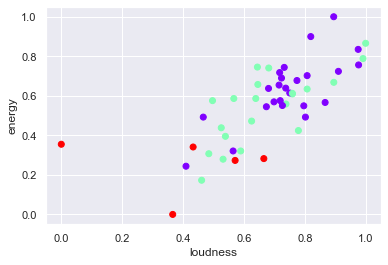

In [13]:
plt.scatter(df['loudness'],df['energy'],c=df['cluster_pred'],cmap='rainbow')
plt.xlabel('loudness')
plt.ylabel('energy')

In [36]:
x=df.iloc[:,6:12]
x.head()

,danceability,acousticness,energy,loudness,tempo,valence
0,0.434470,0.028879,0.766773,0.735940,0.524143,0.479947
1,0.626571,0.087526,0.845048,0.439858,0.725553,0.522727
2,0.545781,0.058747,0.664537,0.492075,0.694169,0.943850
3,0.502693,0.011587,0.937700,0.647277,0.678155,0.985294
4,0.827648,0.428041,0.752396,0.683402,0.161507,0.733957


C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

Text(0, 0.5, 'WCSS')

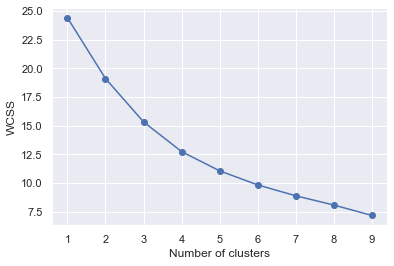

In [38]:
# エルボー法
wcss =[]
# クラスター毎のWCSSの値を求める
for i in range(1,10):
    kmeans = KMeans(n_clusters=i,            # クラスターの個数
                    init='k-means++',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
                    n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
                    max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
                    tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
                    random_state=0) 
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
# クラスターの数とWCSSで散布図を作成
plt.plot(range(1,10),wcss,marker='o')
# 軸に名前を付ける
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [25]:
def music_cluster(csv_name, to_csv_name, num):
    df = pd.read_csv(csv_name)
    # クラスタリング
    x=df.iloc[:,6:12]
    kmeans = KMeans(n_clusters=num,            # クラスターの個数
                init='k-means++',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
                n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
                max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
                tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
                random_state=0)          # セントロイドの初期化に用いる乱数発生器の状態)
    # 予測したデータをdfに入れる
    df['cluster_pred']=kmeans.fit_predict(x)
    df.to_csv(to_csv_name, sep = ',', encoding='utf_8_sig')
    
def elbow(csv_name): # エルボー法
    df = pd.read_csv(csv_name)
    x=df.iloc[:,6:12]
    wcss =[]
    # クラスター毎のWCSSの値を求める
    for i in range(10,31,2):
        kmeans = KMeans(n_clusters=i,            # クラスターの個数
                        init='k-means++',           # セントロイドの初期値をランダムに設定  default: 'k-means++'
                        n_init=10,               # 異なるセントロイドの初期値を用いたk-meansの実行回数 default: '10' 実行したうちもっとSSE値が小さいモデルを最終モデルとして選択
                        max_iter=300,            # k-meansアルゴリズムの内部の最大イテレーション回数  default: '300'
                        tol=1e-04,               # 収束と判定するための相対的な許容誤差 default: '1e-04'
                        random_state=0) 
        kmeans.fit(x)
        wcss.append(kmeans.inertia_)
    # クラスターの数とWCSSで散布図を作成
    plt.plot(range(10,31,2),wcss,marker='o')
    # 軸に名前を付ける
    plt.xlabel('Number of clusters')
    plt.ylabel('WCSS')

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

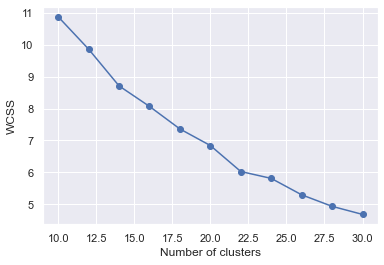

In [26]:
elbow('spotify_data_vocaloid_mm.csv')

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than avai

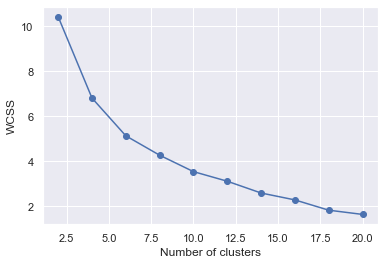

In [49]:
elbow('spotify_data_JP_famous_mm.csv')

In [37]:
music_cluster('spotify_data_global_mm.csv','spotify_data_global_mm_cluster.csv',10)
music_cluster('spotify_data_JP_famous_mm.csv','spotify_data_JP_famous_mm_cluster.csv',20)
music_cluster('spotify_data_vocaloid_mm.csv','spotify_data_vocaloid_mm_cluster.csv',8)

C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [41]:
data=['spotify_data_global_mm_cluster.csv','spotify_data_JP_famous_mm_cluster.csv','spotify_data_vocaloid_mm_cluster.csv']
for i in range(len(data)):
    df=pd.read_csv(data[i])
    df=df.iloc[:,2:]
    df.to_csv(data[i], sep = ',', encoding='utf_8_sig')

In [90]:
# 同じクラスタの曲をおすすめする関数
df=pd.read_csv(data[2]).iloc[:,1:]
min_i=120
name=df.values[min_i][0]
cluster=df.values[min_i][14]
print(name,cluster)
cnt=0
while cnt==0:
    rand=random.randrange(len(df))
    if df.values[rand][14]==cluster:
        new_name=df.values[rand][0]
        new_cluster=df.values[rand][14]
        if new_name!=name:
            cnt=1
print(new_name,new_cluster)

脱法ロック 3
DAYBREAK FRONTLINE 3


In [104]:
def cluster_recommend(name,df):
    data=['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence', 'url', 'image', 'audio', 'cluster_pred']
    df = df[data]
    for i in range(len(df)):
        if df.values[i][0]==name:
            min_i=i
            break
            
    cluster=df.values[min_i][14]
    cnt=0
    while cnt==0:
        rand=random.randrange(len(df))
        if df.values[rand][14]==cluster:
            new_name=df.values[rand][0]
            new_cluster=df.values[rand][14]
            if new_name!=name:
                cnt=1
    return rand

In [116]:
df = pd.read_csv('spotify_data_JP_famous_mm_cluster.csv')
#display(df)
name='Alive'
cluster_recommend(name,df)

245

In [65]:
df=pd.read_csv(data[1]).iloc[:,1:]
print(len(df))

391


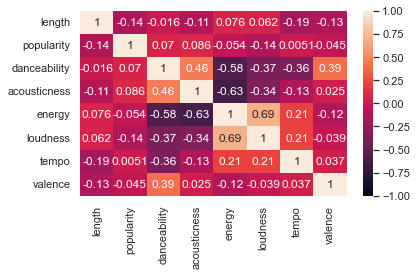

In [36]:
df=pd.read_csv('spotify_data_vocaloid_mm.csv')
df=df.iloc[:,1:].corr()
# ヒートマップ
hm = sns.heatmap(df, cmap=None, annot=True, xticklabels=list(df.columns), yticklabels=list(df.columns),vmin=-1, vmax=1)
# グラフ可視化
plt.tight_layout()
plt.show()

Text(0, 0.5, 'energy')

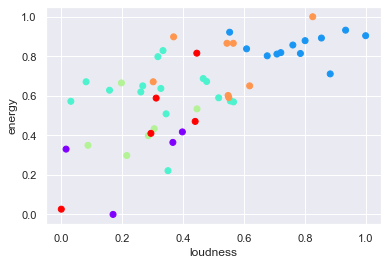

In [45]:
df=pd.read_csv('spotify_data_JP_famous_mm.csv')
plt.scatter(df['loudness'],df['energy'],c=df['cluster_pred'],cmap='rainbow')
plt.xlabel('loudness')
plt.ylabel('energy')